<h1><b> Chapter 9. Chaos and Long Term Evolution </b></h1>
<h3> Action by Santiago Herrera-Guzmán, University of Antioquia</h3>

In the following notebook we are going to study how the phenomenom called Chaos, influence complex systems as the 3 restricted body problem and see how sensible is the evolution of the system to the initial conditions.

We will describe each equation, replicate the graphs and see some real life examples.

For details on the theory please refer directly to the book:

>Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.


In [1]:
#Installing Necessary libraries
!pip install -q rebound
!pip install -q pymcel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.2 MB/s eta 0:00:00


## 9.2 Sensitive Dependence to Initial Conditions


Consider a test particle in the vecinity of the planet Jupiter orbiting the Sun, making the aproximation to a planar circular restricted three-body problem (CRTBP). Let´s see how changing briefly the initial conditions of the test particle can influence of it´s orbit, by changing to a factor of only 0.3 in initial longitude ($l$).

We are going to simulate this system using _Rebound_ and then make an animation to apreciate the "butterfly effect" during one Jupiter period.

In [188]:
#Importing necessary libraries
import rebound as rb #To make the simulations
import numpy as np #To use important mathematical functions
import matplotlib.pyplot as plt #for plotting
from IPython.display import HTML #to make animations
from matplotlib import animation, transforms #to make animations
from pymcel import ncuerpos_solucion #to solve the CRTBP
import random #will be used in some calculation
import seaborn as sns #for plotting

In [3]:
#We define convertion units
deg = np.pi/180
rad = 180/np.pi

In [267]:
def simulation(sma, ex, ω, θ, T):
  sim = rb.Simulation()

  sim.units = ('au', 'msun', 'yr')

  # Adding Objects
  sim.add(m=1)
  sim.add(m=1/1047., a=5.2, e=0, inc=0, Omega=0, omega=0, l=0)
  sim.add(m=0., a = 5.2*sma, e=ex, omega = ω*deg, theta = θ*deg)

  # Configurings variable output.
  ps = sim.particles

  # Defining total time and number of points of the simulation.
  tmax = ps[1].P * T
  Nout = 1000
  times = np.linspace(0, tmax, Nout)

  # Empty lists for particles trayectory.
  r_jup = np.zeros((2,Nout))
  r_part = np.zeros((2,Nout))
  r_sun = np.zeros((2,Nout))
  param_part = np.zeros((2,Nout))
  v_part = np.zeros((2, Nout))

  for i,time in enumerate(times):
      sim.integrate(time)
      r_sun[0][i] = ps[0].x
      r_sun[1][i] = ps[0].y

      r_jup[0][i] = ps[1].x
      r_jup[1][i] = ps[1].y

      r_part[0][i] = ps[2].x
      r_part[1][i] = ps[2].y

      param_part[0][i] = ps[2].a
      param_part[1][i] = ps[2].e

      v_part[0][i] = ps[2].vx
      v_part[1][i] = ps[2].vy

  return np.array([r_sun, r_jup, r_part, param_part, v_part])

In [ ]:
system_1 = simulation(0.8, 0.4, 293, 293, 1)
system_2 = simulation(0.8, 0.4, 293, 293.3, 1)

We will use the same procedure to simulate again the modified test particle´s trayectory.

In [ ]:
#Defining figure
fig,ax = plt.subplots(figsize = ((9,9)))
ts = np.linspace(0, 3, 1000)
plt.close(fig)

sun, = ax.plot([], [], '*', color = 'yellow', markevery=[-1], markersize = 13)
jupiter, = ax.plot([], [], 'ro-', markevery=[-1])
test1, = ax.plot([], [], 'o-', markevery=[-1])
test2, = ax.plot([], [], 'o-', markevery=[-1])

#Defining animating function
def pone_punto(it):
  sun.set_data(system_1[0][0][0:it], system_1[0][1][0:it])
  jupiter.set_data(system_1[1][0][0:it], system_1[1][1][0:it])
  test1.set_data(system_1[2][0][0:it], system_1[2][1][0:it])
  test2.set_data(system_2[2][0][0:it], system_2[2][1][0:it])
  ax.axis([-12, 12, -12, 12])
  ax.set_facecolor('black')
  plt.style.use('dark_background')
  return sun, jupiter, test1, test2

anim = animation.FuncAnimation(fig, pone_punto, frames=len(ts), interval=10)
HTML(anim.to_html5_video())

Now we are going to see another example of the chaotic behaviour of the CRTBP looking the evolution of the semi major axis of the test particle when we modify the initial conditions (see the book for a more detailing description).

In [ ]:
system_3 = simulation(0.6984, 0.1967, 0, 0, 300)
system_4 = simulation(0.6984, 0.1967, 0, 1e-6, 300)

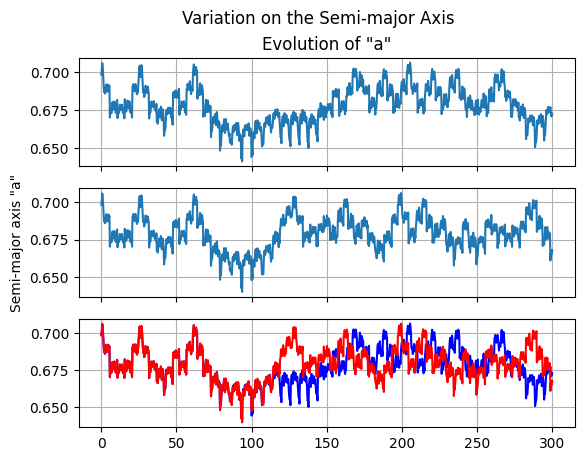

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Variation on the Semi-major Axis')
ax1.plot(np.linspace(0,300,1000), system_3[3][0]/5.2)
ax2.plot(np.linspace(0,300,1000), system_4[3][0]/5.2)
ax3.plot(np.linspace(0,300,1000), system_3[3][0]/5.2, color = 'blue')
ax3.plot(np.linspace(0,300,1000), system_4[3][0]/5.2, color = 'red')
ax3.set_xlabel=('Jupiter Periods')
ax2.set_ylabel('Semi-major axis "a"')
ax1.set_title('Evolution of "a"')
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()


As we can appreciate in the above figures, we see that the orbital evolution is exactly the same for 125 Juputer periods approximately, after which they start to differ.

## 9.3 Regular and Chaotic Problems

### 9.3.1 The Poincaré Surface of Section

In the CRTBP, the equations of motion are given by the following two, simultaneous, differential, nonlinear, second-order differential equations:
$$ \ddot{x} - 2n\dot{y} - n^2 x = \mu_1 \frac{x + \mu_2}{r^3_1} + \mu_2\frac{x + \mu_1}{r^3_2} $$ \
$$ \ddot{y} - 2n\dot{x} - n^2 y =  \frac{\mu_1}{r^3_1} + \frac{\mu_2}{r^3_2} y $$ \

Where $\mu_1 = m_1 / m_1 + m_2$, $\mu_2 = m_2 / m_1 + m_2$ and:
$$ r^2_1 = (x + \mu_2)^2 + y^2 $$\
$$ r^2_2 = (x + \mu_1)^2 + y^2 $$\

The solution consist of sets of values of $x$, $y$, $\dot{x}$ and $\dot{y}$, noticing that these are the position and velocity vectors in the rotating reference frame.
Now remembering the Jacobi constant, given by the following expression:
$$C_j = n^2 (x^2 + y^2) + 2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) - \dot{x^2} - \dot{y^2} $$
We have that the trayectory of the particle if confined to a surface in the phase space

###9.3.2 Regular Orbits

In the next figure, we show the evolution of a and e as a function of time. Although there are obvious variations, the plot shows a regular variation in the semi-major axis and eccentricity.

At this particular location we would expect to see resonant perturbations and the orbit of the test particle is close to a 7:4 resonance with Jupiter (read this chapter's section for more details).

In [268]:
system_5 = simulation(0.6944, 0.2065, 0, 0, 300)

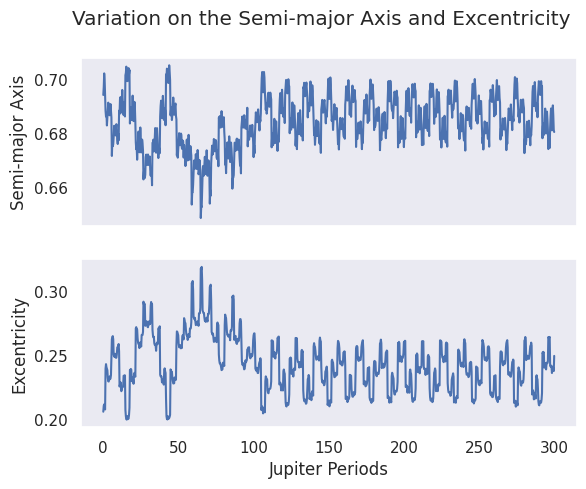

In [263]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Variation on the Semi-major Axis and Excentricity')
ax1.plot(np.linspace(0,300,1000), system_5[3][0]/5.2)
ax2.plot(np.linspace(0,300,1000), system_5[3][1])
ax1.set(ylabel='Semi-major Axis')
ax2.set(xlabel='Jupiter Periods', ylabel='Excentricity')
ax1.grid()
ax2.grid()
plt.show()

Figure 9.5 shows the same trajectory displayed as a surface ofsection, obtained
by plotting the values of $x$ and $\dot{x}$ whenever $y = 0$ with $\dot{y} > 0$.

In [281]:
#Conditions
c1 = 0.001 > abs(system_5[2][1])
c2 = system_5[4][1] >0
c3 = np.where(c1 == c2)[0]

Text(0, 0.5, 'y')

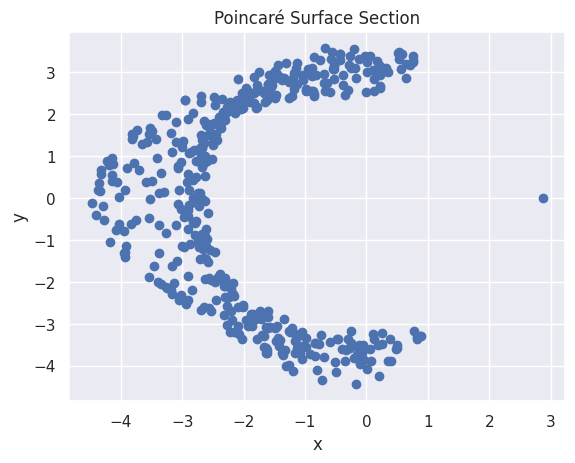

In [282]:
plt.scatter(system_5[2][0][c3], system_5[4][0][c3])
plt.title('Poincaré Surface Section')
plt.xlabel('x')
plt.ylabel('y')

The appearance of such islands is one characteristic of resonant motion when displayed as a surface of section. In these cases a mean motion resonance of the form $p + q : p$, where p and q are integers, produces $q$ islands.
In this case $p = 4$, $q = 3$, and three islands are visible.

**NOTE:** In this particular case, I didn't get the expected outcome and thus, the three islands can't be seen at all. But the map is similar to the image.

###9.3.3 Chaotic Orbits

The following figure shows the plots of $e$ and $a$ as a function of time for the test particle.

The corresponding orbital elements are $a_0 = 0.6984$ and $e_0 = 0.1967$. Note that although these values are only slightly different from those used above, the nature of the variations in $e$ and $a$ are very different.

In [ ]:
system_6 = simulation(0.6984, 0.1967, 0, 0, 300)

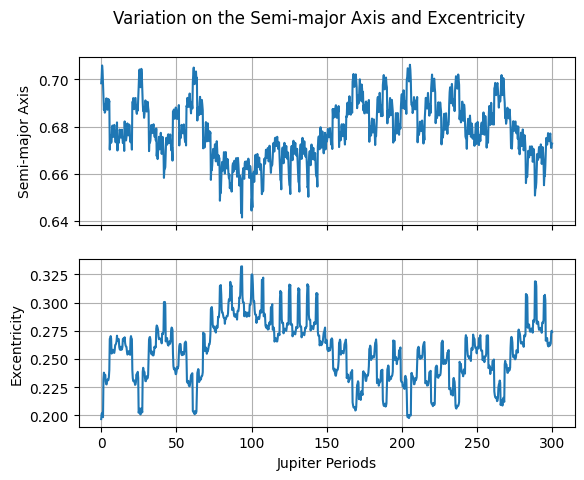

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Variation on the Semi-major Axis and Excentricity')
ax1.plot(np.linspace(0,300,1000), system_6[3][0]/5.2)
ax2.plot(np.linspace(0,300,1000), system_6[3][1])
ax1.set(ylabel='Semi-major Axis')
ax2.set(xlabel='Jupiter Periods', ylabel='Excentricity')
ax1.grid()
ax2.grid()
plt.show()

As we can see in the above figures, sometimes the variation in the excentricity or in the semi-major axis can follow a regular variation for longs periods of time; despite it is a chaotic behaviour. So in some cases, chaos in the CRTBP can be confused with regular variations.

To difference both cases we wil use the next factor.

###9.3.4 The Lyapounov Exponent

Chaotic orbits have the characteristic that they are sensitively dependent on initial conditions. This is illustrated in the next figure, where we show part of the plot of e as a function of time for two similar chaotic trajectories.

We can make use of the type of divergence seen in Fig. to measure the _maximum Lyapounov characteristic exponent_ (LCE) of a dynamical system, giving us a quantitative measure of the rate of divergence of nearby trajectories.

Consider two orbits separated in phase space by a distance $d_0$ at time $t_0$. Let $d$ be their separation at time $t$. The orbit is chaotic if $d$ is approximately related to $d_0$ by
$$ d = d_0exp(t-t_0)γ $$

Where:
- $γ$: maximum Lyapounov characteristic exponent.
- $d_0$: initial separation distance between two orbits in the phase space.
- $t_0$: initial time

Note that the $\gamma$ has to be positive; otherwise, the value of the distance would decrease, causing the orbits to not differ much from each other.

We can solve for the Lyapunov exponent of the previous equation to obtain the following expression:
$$γ = \frac{d}{d_0 exp(t-t_0)}$$


Let's see an example of this using the following chaotic system:

We will use a particular configuration, change a little bit the position x-y of the test particle in a random way and get 9 other systems with subtle changes in the initial conditions.

In [141]:
#Defining the main system
systems = []
initial_system = [dict(m=100.0, r=[-0.142857,0,0], v=[0,-2.958,0]), dict(m=5.0, r=[2.85714,0,0],v=[0,2.958,0]),
        dict(m=0.01, r=[3.62345, 0, 0], v=[0,4.9700107,0])]
systems += [initial_system]

#Creating the other 9 systems
for i in range(1,10):

  a = random.uniform(0, 0.1)
  b = random.randint(0,2)

  if b == 0:

    systems += [[dict(m=100.0, r=[-0.142857,0,0], v=[0,-2.958,0]), dict(m=5.0, r=[2.85714,0,0],v=[0,2.958,0]),
        dict(m=0.01, r=[3.62345 + a, 0, 0], v=[0,4.9700107,0])]] #particula nominal

  if b == 1:

    systems += [[dict(m=100.0, r=[-0.142857,0,0], v=[0,-2.958,0]), dict(m=5.0, r=[2.85714,0,0],v=[0,2.958,0]),
        dict(m=0.01, r=[3.62345 - a, 0, 0], v=[0,4.9700107,0])]] #particula nominal

  if b == 2:

    systems += [[dict(m=100.0, r=[-0.142857,0,0], v=[0,-2.958,0]), dict(m=5.0, r=[2.85714,0,0],v=[0,2.958,0]),
        dict(m=0.01, r=[3.62345, 0 + a, 0], v=[0,4.9700107,0])]] #particula nominal

  if b == 3:

    systems += [[dict(m=100.0, r=[-0.142857,0,0], v=[0,-2.958,0]), dict(m=5.0, r=[2.85714,0,0],v=[0,2.958,0]),
        dict(m=0.01, r=[3.62345, 0 - a, 0], v=[0,4.9700107,0])]] #particula nominal

systems = np.array(systems)

Now we are going to solve each system with a function from the library _pymcel_, called _'ncuerpos_solucion'_. Integrating the problem in 5 canonic times.

In [182]:
#Time of iteration
ts= np.linspace(0,15,1000)

rs = []

for i in range(len(systems)):
  rs += [ncuerpos_solucion(systems[i],ts)[2]]

rs = np.array(rs)

Here a little animation, showing the chaotic behaviour of the system.

_**Note**_: The red dots are the particles from the original system and the rest are the modified test particles.

In [186]:
#Defino la figura
fig,ax=plt.subplots(figsize = ((8,8)))


#Cierro la grafica no animada
plt.close(fig)


punto1, = ax.plot([], [], 'ro-', markevery=[-1]) #Partícula nominal

punto2, = ax.plot([], [], 'o-', markevery=[-1])
punto3, = ax.plot([], [], 'o-', markevery=[-1])
punto4, = ax.plot([], [], 'o-', markevery=[-1])
punto5, = ax.plot([], [], 'yo-', markevery=[-1])    #Partículas de prueba
punto6, = ax.plot([], [], 'o-', markevery=[-1])
punto7, = ax.plot([], [], 'o-', markevery=[-1])
punto8, = ax.plot([], [], 'o-', markevery=[-1])
punto9, = ax.plot([], [], 'o-', markevery=[-1])
punto10, = ax.plot([], [], 'bo-', markevery=[-1])

punto11, = ax.plot([], [], 'ro-', markevery=[-1]) #Particula Central
punto12, = ax.plot([], [], 'ro-', markevery=[-1]) #Particula mediana

b = np.array([punto1,punto2,punto3,punto4,punto5,punto6,punto7,punto8,punto9,punto10]) #Arreglo con los puntos de cada particula de prueba y nominal


#defino la función para animar
def pone_punto(it):
  for i in range(len(b)):
    b[i].set_data(rs[i,2,:,0][0:it],rs[i,2,:,1][0:it])
  punto11.set_data(rs[0,0,:,0][0:it], rs[0,0,:,1][0:it])
  punto12.set_data(rs[0,1,:,0][0:it], rs[0,1,:,1][0:it])
  ax.axis([-10, 10, -10, 10])
  ax.set_facecolor('black')
  plt.style.use('dark_background')
  return punto1, punto11, punto12
anim=animation.FuncAnimation(fig,pone_punto,frames=len(ts),interval=20)



HTML(anim.to_html5_video())

To compute the distance between the test particle and his equivalent in the other system (the same test particle but with slighly different position), we are going to use the following approximation:

$$ D(t)^2 = \frac{[r(t)−r_n(t)]^2}{a^2} + \frac{[v(t)−v_n(t)]^2}{v₀^2}$$

Where:
- $r$ and $v$ are the position and velocity vector respectively from the modified particle's trayectory.
- $r_n$ and $v_n$ are the position and velocity vector from the original test particle's trayectory.
- $a$ is the average distance between the 2 most massives bodies in each system.
- $v_0$ is the relative speed between the 2 most massives bodies in each system.

We are now going to compute each missing component to use the above equation.

In [190]:
#Using the function from pymcel to calculate the volocity vector
vs = []

for i in range(len(systems)):
  vs += [ncuerpos_solucion(systems[i],ts)[3]]

vs = np.array(vs)

In [191]:
#Computing the average distance a
a = []

for i in range(len(rs[0][0])):
  a += [np.sqrt(np.dot((abs(rs[0][0])+np.abs(rs[0][1]))[i],(abs(rs[0][0])+np.abs(rs[0][1]))[i]))]

a = np.array(a)
a = np.mean(a)

In [192]:
#Computing the relative speed v0
v0 = []

for i in range(len(vs)):
  v0 += [np.linalg.norm(vs[i])]

v0 = np.array(v0)
v0 = np.mean(v0)

Now we compute the distance for each modified test particle with the original.

In [193]:
D = [[], [], [], [], [], [], [], [], []]

for j in range(1,len(systems)):
  for i in range(len(rs[1,2])):
    D[j-1] +=[ (np.dot(rs[j,2,i] - rs[0,2,i], rs[j,2,i] - rs[0,2,i])/(a*a)) + (np.dot(vs[j,2,i] - vs[j,2,i], vs[j,2,i] - vs[j,2,i])/(v0*v0))]

D = np.array(D)


In [211]:
#Calculating Gamma
gamma = np.zeros((9,len(ts)))

for j in range(9):
  for i in range(1,len(ts)):
    gamma[j,i] = np.log(D[j,i]/D[0,0])/(ts[i]-ts[0])

Let's see the evolution of the Lyapounov Exponent in each system.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 12))

titles = ['System 1', 'System 2', 'System 3', 'System 4', 'System 5',
           'System 6', 'System 7', 'System 8', 'System 9']

for i, ax in enumerate(axes.flatten()):

    sns.lineplot(ax=ax, x=np.log(ts[300:-1]), y=np.log(gamma[i][300:-1]))
    ax.set_title(titles[i])
    ax.set_xlabel('Ln(t)')
    ax.set_ylabel('Ln(γ)')

plt.tight_layout()


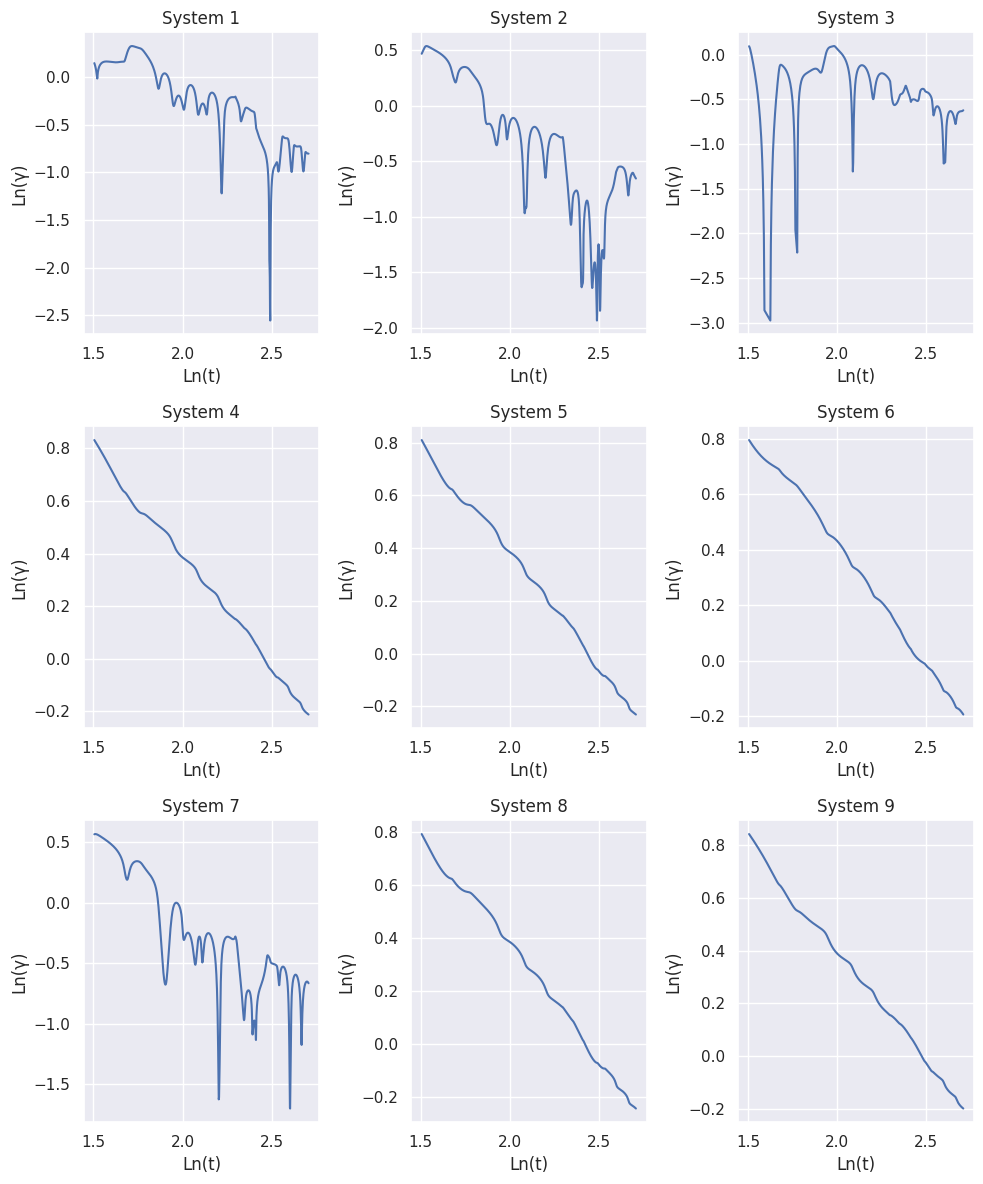

Note that the Lyapounov exponent has differents behaviours in each system. We previously mentioned that the value tends to be positive when is chaotic, because the orbits are drifting apart from each other; this case can be observed in" in graphs $1$, $2$, $3$ and $7$.

On the contrary, for regular trajectories the initial and final displacements tends to be close to each other. Showing in the Log-Log graph that it has a slope of -1; which can be seen in graphs $4$, $5$, $6$, $8$ and $9$.

**NOTE**: if you execute again the notebook, you will obtain a different outcome shown in the above image; remember that the test particle's variation is random.